# Traffic Accident Predicition using SVM

### Importing essential libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('dataset/dataset_traffic_accident_prediction.csv')

### Data Preprocessing

In [6]:
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [7]:
print('Total Number of {} rows and {} columns in the Accident dataset'.format(df.shape[0],df.shape[1]))

Total Number of 840 rows and 14 columns in the Accident dataset


In [8]:
# Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


In [9]:
df.describe()

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Driver_Experience,Accident
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,1.001253,71.050125,3.286967,0.160401,43.259398,38.981203,0.299499
std,0.784894,32.052458,2.017267,0.367208,15.129856,15.273201,0.458326
min,0.000000,30.000000,1.000000,0.000000,18.000000,9.000000,0.000000
25%,0.000000,50.000000,2.000000,0.000000,30.000000,26.000000,0.000000
50%,1.000000,60.000000,3.000000,0.000000,43.000000,39.000000,0.000000
75%,2.000000,80.000000,4.000000,0.000000,56.000000,52.750000,1.000000
max,2.000000,213.000000,14.000000,1.000000,69.000000,69.000000,1.000000


In [10]:
# Unique values in categorical columns
for col in df.select_dtypes(include = ['object']).columns:
    print(f"{col}: {df[col].unique()}\n")

Weather: ['Rainy' 'Clear' 'Foggy' 'Stormy' nan 'Snowy']

Road_Type: ['City Road' 'Rural Road' 'Highway' nan 'Mountain Road']

Time_of_Day: ['Morning' 'Night' 'Evening' 'Afternoon' nan]

Accident_Severity: [nan 'Moderate' 'Low' 'High']

Road_Condition: ['Wet' 'Icy' 'Under Construction' 'Dry' nan]

Vehicle_Type: ['Car' 'Truck' 'Bus' 'Motorcycle' nan]

Road_Light_Condition: ['Artificial Light' 'Daylight' 'No Light' nan]



In [11]:
# Checking for NULL values
df.isnull().sum()

Weather                 42
Road_Type               42
Time_of_Day             42
Traffic_Density         42
Speed_Limit             42
Number_of_Vehicles      42
Driver_Alcohol          42
Accident_Severity       42
Road_Condition          42
Vehicle_Type            42
Driver_Age              42
Driver_Experience       42
Road_Light_Condition    42
Accident                42
dtype: int64

In [12]:
# Fill categorical features with mode (most frequent value)
categorical_features = ['Weather', 'Road_Type', 'Time_of_Day', 'Accident_Severity', 
                        'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition']
df.fillna({col: df[col].mode()[0] for col in categorical_features}, inplace = True)

# Fill numerical features with median (for highly skewed data points) 
numerical_features_median = ['Traffic_Density', 'Speed_Limit', 'Number_of_Vehicles']
df.fillna({col: df[col].median() for col in numerical_features_median}, inplace = True)

# Fill numerical features with mean (for normally distributed data points)
numerical_features_mean = ['Driver_Age', 'Driver_Experience'] 
df.fillna({col: df[col].mean() for col in numerical_features_mean}, inplace = True)

# Fill Driver_Alcohol with 0 (assuming no alcohol consumption if missing)
df['Driver_Alcohol'] = df['Driver_Alcohol'].fillna(0)

# Fill Accident column using mode 
df['Accident'] = df['Accident'].fillna(df['Accident'].mode()[0])

In [13]:
df.isnull().sum()

Weather                 0
Road_Type               0
Time_of_Day             0
Traffic_Density         0
Speed_Limit             0
Number_of_Vehicles      0
Driver_Alcohol          0
Accident_Severity       0
Road_Condition          0
Vehicle_Type            0
Driver_Age              0
Driver_Experience       0
Road_Light_Condition    0
Accident                0
dtype: int64

In [14]:
# Checking for Duplicate Values
duplicates_count = df.duplicated().sum()
print(duplicates_count)

18


In [15]:
# Removing duplicates from the dataset
df.drop_duplicates(inplace = True)

In [16]:
duplicates_count = df.duplicated().sum()
print(duplicates_count)

0


### Exploratory Data Analysis

### Univariate Analysis

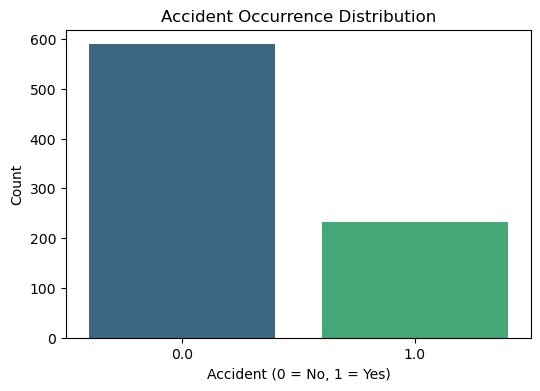

In [19]:
# Distribution of the Target Variable (Accident)
plt.figure(figsize = (6, 4))
sns.countplot(x = df['Accident'], palette = 'viridis')
plt.title('Accident Occurrence Distribution')
plt.xlabel('Accident (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

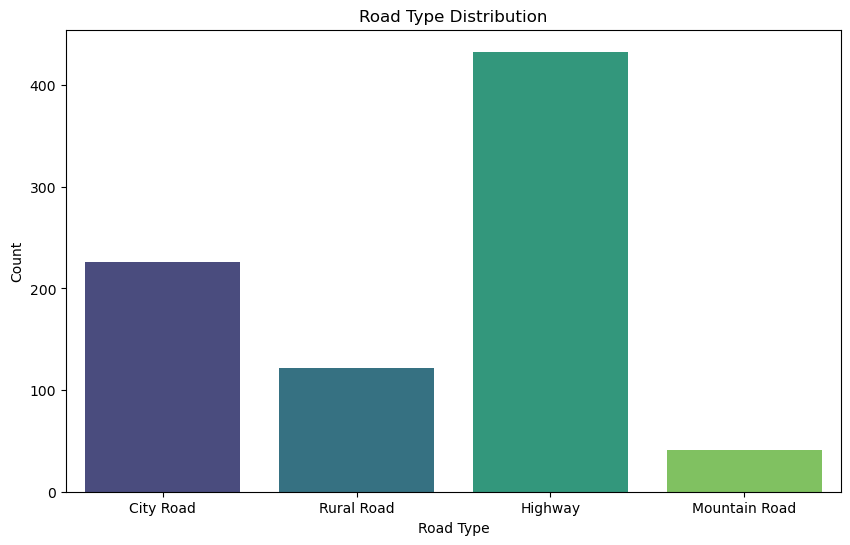

In [20]:
# Road type
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = 'Road_Type', palette='viridis')
plt.title('Road Type Distribution')
plt.xlabel('Road Type')
plt.ylabel('Count')
plt.show()

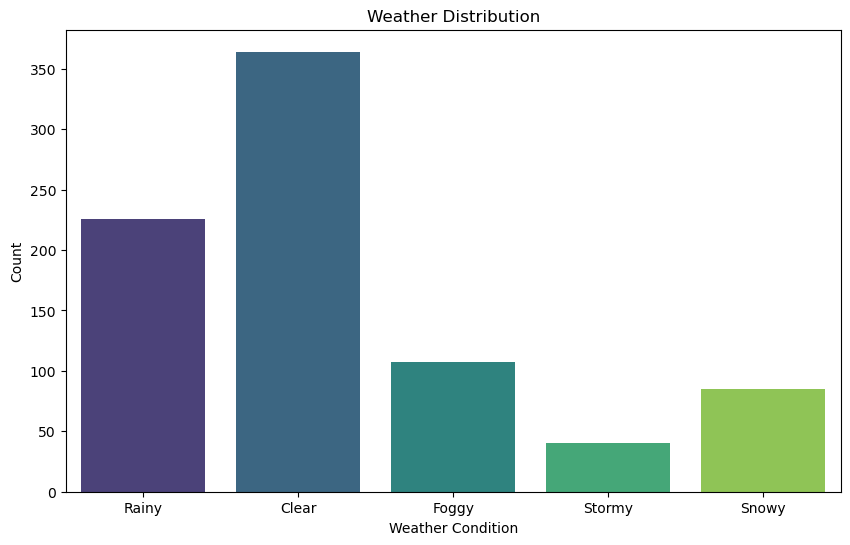

In [21]:
# Weather distribution
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = 'Weather', palette = 'viridis')
plt.title('Weather Distribution')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.show()

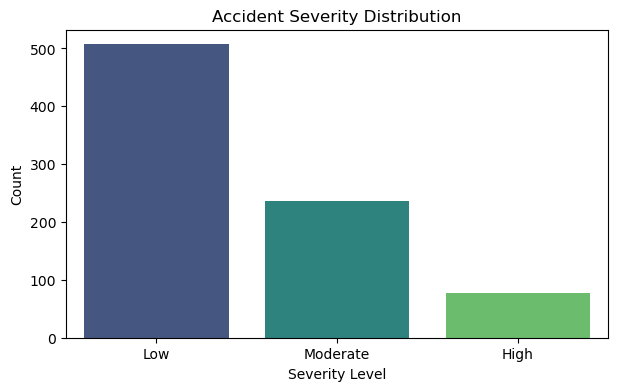

In [22]:
# Accident Severity Analysis
plt.figure(figsize = (7, 4))
sns.countplot(x = df['Accident_Severity'], palette = 'viridis')
plt.title('Accident Severity Distribution')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.show()


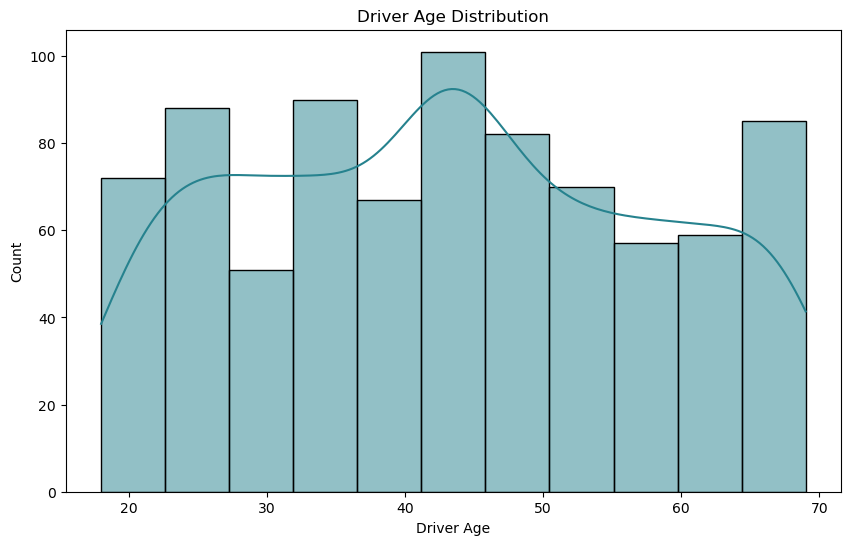

In [23]:
# Driver Age Distribution
plt.figure(figsize = (10, 6))
sns.histplot(df['Driver_Age'], kde = True, color = '#26828E')
plt.title('Driver Age Distribution')
plt.xlabel('Driver Age')
plt.ylabel('Count')
plt.show()

### Bivariate Analysis

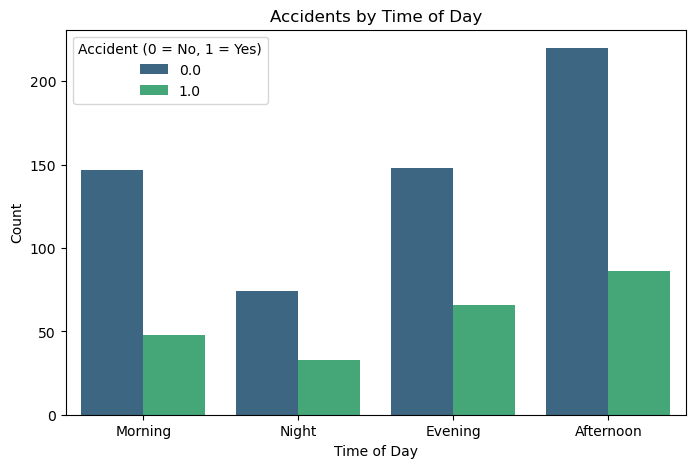

In [25]:
# Accidents by Time of Day
plt.figure(figsize = (8, 5))
sns.countplot(x = df['Time_of_Day'], hue = df['Accident'], palette = 'viridis')
plt.title('Accidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.legend(title = 'Accident (0 = No, 1 = Yes)')
plt.show()

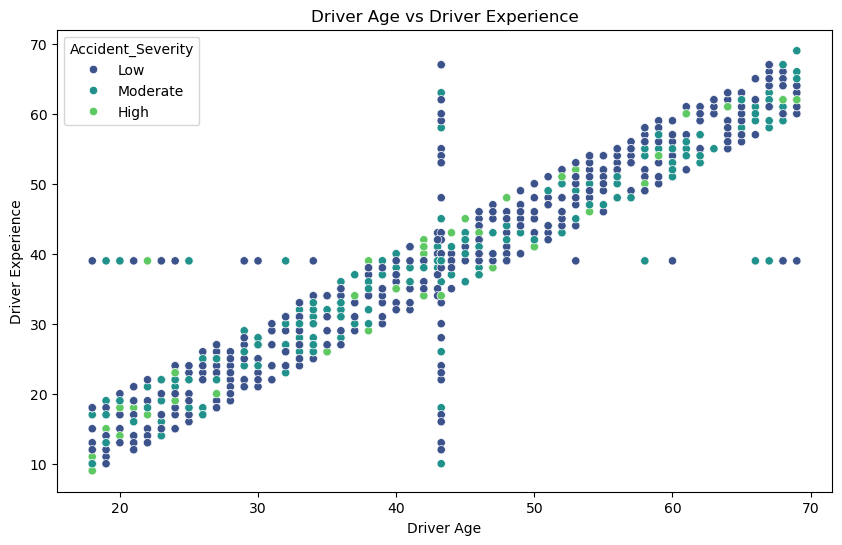

In [26]:
# Driver Age and Driver Experience in contrast with accident occurrence
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df, x = 'Driver_Age', y = 'Driver_Experience', hue = 'Accident_Severity', palette = 'viridis')
plt.title('Driver Age vs Driver Experience')
plt.xlabel('Driver Age')
plt.ylabel('Driver Experience')
plt.show()

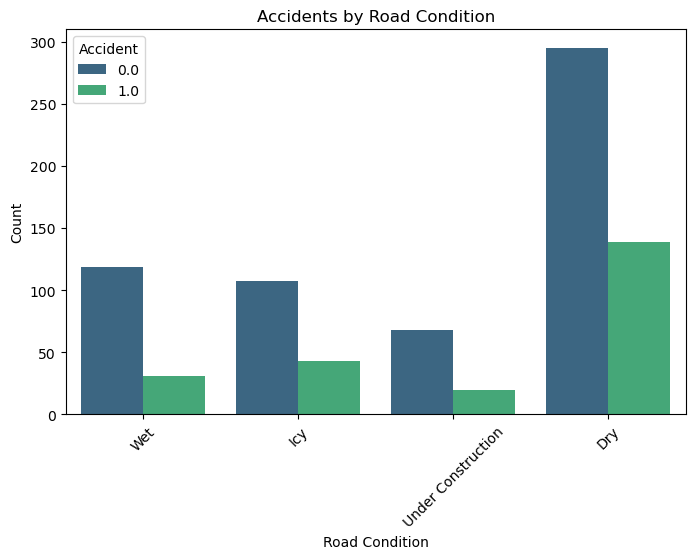

In [27]:
# Road Condition Impact
plt.figure(figsize = (8, 5))
sns.countplot(x = df['Road_Condition'], hue = df['Accident'], palette = 'viridis')
plt.xticks(rotation=45)
plt.title('Accidents by Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Count')
plt.legend(title = 'Accident')
plt.show()

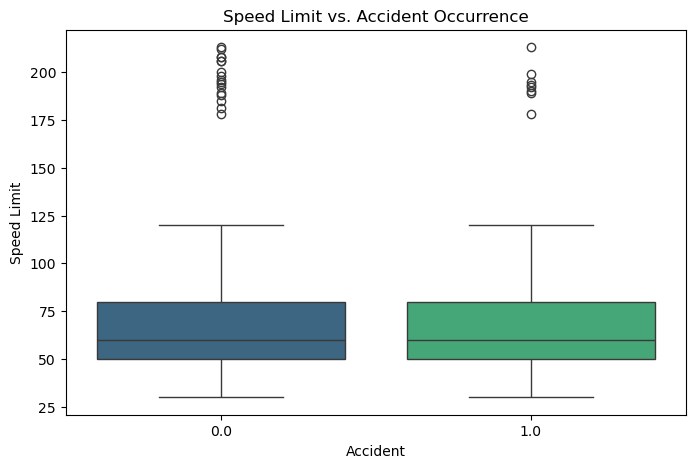

In [28]:
# Speed Limit vs Accident Rate 
plt.figure(figsize = (8, 5))
sns.boxplot(x = df['Accident'], y = df['Speed_Limit'], palette = 'viridis')
plt.title('Speed Limit vs. Accident Occurrence')
plt.xlabel('Accident')
plt.ylabel('Speed Limit')
plt.show()

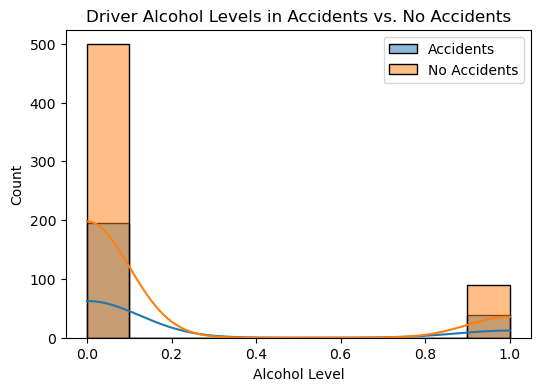

In [29]:
# Driver Alcohol influence on Accidents
plt.figure(figsize = (6, 4))
sns.histplot(df[df['Accident'] == 1]['Driver_Alcohol'], bins = 10, kde = True, palette = 'viridis', label = 'Accidents')
sns.histplot(df[df['Accident'] == 0]['Driver_Alcohol'], bins = 10, kde = True, palette = 'viridis', label = 'No Accidents')
plt.title('Driver Alcohol Levels in Accidents vs. No Accidents')
plt.xlabel('Alcohol Level')
plt.ylabel('Count')
plt.legend()
plt.show()


### Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
# Createing copy of the dataset to avoid modifying original data
df_encoded = df.copy()

# Apply Label Encoding to ordinal categorical features
label_encoder = LabelEncoder()
df_encoded['Accident_Severity'] = label_encoder.fit_transform(df_encoded['Accident_Severity'])

# Apply One-Hot Encoding to nominal categorical features
df_encoded = pd.get_dummies(df_encoded, columns = ['Weather', 'Road_Type', 'Time_of_Day', 'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition'], drop_first = True)  
# drop_first = True to avoid dummy variable trap

In [33]:
print(df_encoded.dtypes)

Traffic_Density                      float64
Speed_Limit                          float64
Number_of_Vehicles                   float64
Driver_Alcohol                       float64
Accident_Severity                      int64
Driver_Age                           float64
Driver_Experience                    float64
Accident                             float64
Weather_Foggy                           bool
Weather_Rainy                           bool
Weather_Snowy                           bool
Weather_Stormy                          bool
Road_Type_Highway                       bool
Road_Type_Mountain Road                 bool
Road_Type_Rural Road                    bool
Time_of_Day_Evening                     bool
Time_of_Day_Morning                     bool
Time_of_Day_Night                       bool
Road_Condition_Icy                      bool
Road_Condition_Under Construction       bool
Road_Condition_Wet                      bool
Vehicle_Type_Car                        bool
Vehicle_Ty

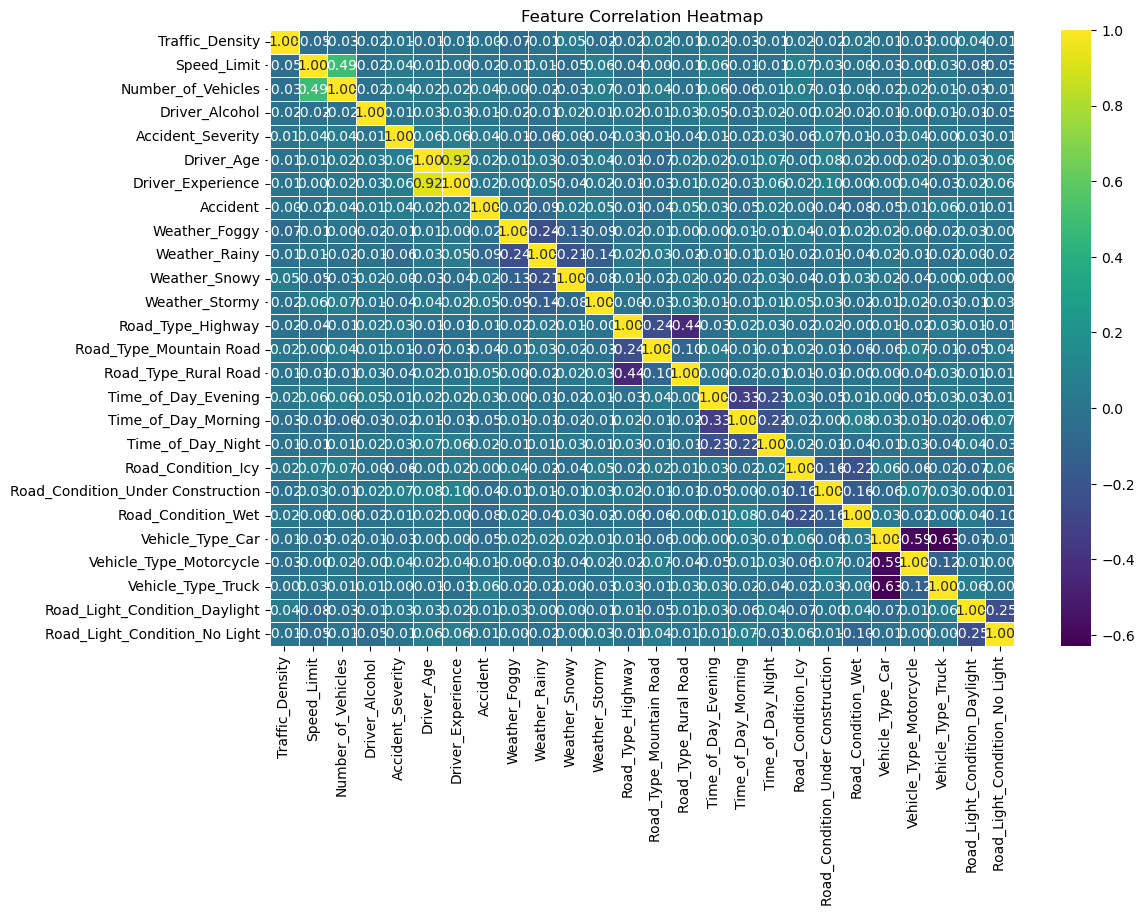

In [34]:
# Lets take a look at our correlation matrix to examine the relationship between variables

corr_matrix = df_encoded.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f", cmap = "viridis", linewidths = 0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### Feature Selection

In [36]:
# Identifying highly correlated features
corr_matrix = df_encoded.corr()
high_corr_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.85:  # Threshold for high correlation
            col_name = corr_matrix.columns[i]
            high_corr_features.add(col_name)

print("Highly Correlated features: ", high_corr_features)

Highly Correlated features:  {'Driver_Experience'}


In [37]:
# Removing highly correlated features
df_encoded.drop(columns = high_corr_features, inplace = True)
print("Removed Highly Correlated Features:", high_corr_features)

Removed Highly Correlated Features: {'Driver_Experience'}


### Training and Testing Split

In [39]:
X = df_encoded.drop(columns = ["Accident"])
Y = df_encoded['Accident']

In [40]:
X.head()

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Driver_Age,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Stormy,...,Time_of_Day_Morning,Time_of_Day_Night,Road_Condition_Icy,Road_Condition_Under Construction,Road_Condition_Wet,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_Truck,Road_Light_Condition_Daylight,Road_Light_Condition_No Light
0,1.0,100.0,5.0,0.0,1,51.0,False,True,False,False,...,True,False,False,False,True,True,False,False,False,False
1,1.0,120.0,3.0,0.0,2,49.0,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
2,1.0,60.0,4.0,0.0,1,54.0,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False
3,2.0,60.0,3.0,0.0,1,34.0,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,1.0,195.0,11.0,0.0,1,62.0,False,True,False,False,...,True,False,False,False,False,True,False,False,False,False


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = Y)
print("Training Set:", X_train.shape, "Testing Set:", X_test.shape)

Training Set: (657, 24) Testing Set: (165, 24)


### Resampling

In [43]:
# As our dataset is imbalanced, we need to apply sampling techniques to improve model performance

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Defining the resampling strategy
smote = SMOTE(sampling_strategy = 0.7, random_state = 42)  # Oversampling minority class
undersample = RandomUnderSampler(sampling_strategy = 0.7, random_state = 42)  # Undersampling majority class

# Creating a pipeline
resampling_pipeline = Pipeline([
    ('SMOTE', smote),
    ('Undersample', undersample)
])

# Apply resampling on training data
X_train_resampled, Y_train_resampled = resampling_pipeline.fit_resample(X_train, Y_train)

# Checking new class distribution
from collections import Counter
print("Class distribution after resampling:", Counter(Y_train_resampled))


Class distribution after resampling: Counter({0.0: 470, 1.0: 329})


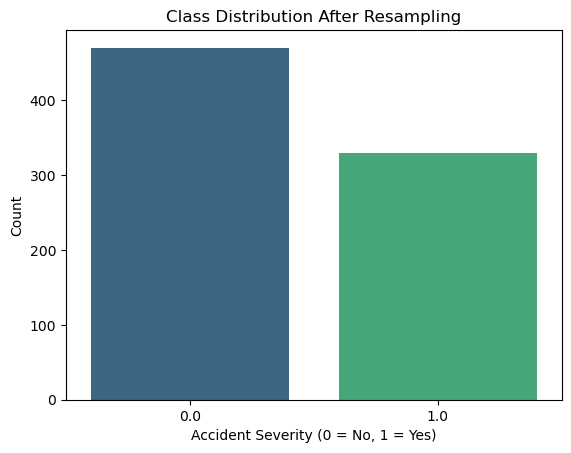

In [44]:
# Plot class distribution
sns.barplot(x = list(Counter(Y_train_resampled).keys()), y = list(Counter(Y_train_resampled).values()), palette = 'viridis')
plt.title("Class Distribution After Resampling")
plt.xlabel("Accident Severity (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

### Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test) 


### SVM Model Training

In [48]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', class_weight='balanced', random_state = 42)

svm_model.fit(X_train_scaled, Y_train_resampled)

SVC(class_weight='balanced', random_state=42)

In [49]:
Y_pred = svm_model.predict(X_test_scaled)

### Evaluating Model Performance

In [51]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report: ", classification_report(Y_test, Y_pred))

Accuracy: 0.6121
Classification Report:                precision    recall  f1-score   support

         0.0       0.71      0.77      0.74       118
         1.0       0.27      0.21      0.24        47

    accuracy                           0.61       165
   macro avg       0.49      0.49      0.49       165
weighted avg       0.59      0.61      0.60       165



### Hyperparameter Tuning

In [53]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

# Grid Search
grid_search = GridSearchCV(SVC(), param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_search.fit(X_train_scaled, Y_train_resampled)

# Best Parameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [54]:
# Train final model with best params
best_svm = grid_search.best_estimator_
best_svm.fit(X_train_scaled, Y_train_resampled)

# Predictions with best model
Y_pred_best = best_svm.predict(X_test_scaled)

# Evaluate the best model
print("Final Model Performance:\n", classification_report(Y_test, Y_pred_best))

Final Model Performance:
               precision    recall  f1-score   support

         0.0       0.72      0.90      0.80       118
         1.0       0.29      0.11      0.16        47

    accuracy                           0.67       165
   macro avg       0.51      0.50      0.48       165
weighted avg       0.60      0.67      0.61       165



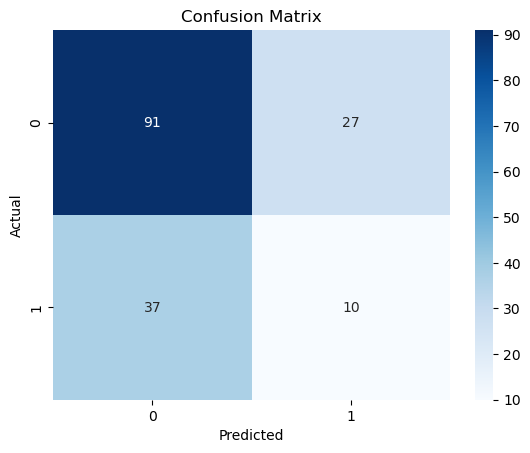

In [55]:
# Confision Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues", xticklabels = [0, 1], yticklabels = [0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Comparing with other models

In [57]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

model_rf.fit(X_train_scaled, Y_train_resampled)

RandomForestClassifier(random_state=42)

In [58]:
Y_pred_rf = model_rf.predict(X_test_scaled)

In [102]:
accuracy = accuracy_score(Y_test, Y_pred_rf)

print(f"Accuracy: {accuracy:.4f}")

print("Classification Report: ", classification_report(Y_test, Y_pred_rf))

Accuracy: 0.6667
Classification Report:                precision    recall  f1-score   support

         0.0       0.71      0.89      0.79       118
         1.0       0.28      0.11      0.15        47

    accuracy                           0.67       165
   macro avg       0.50      0.50      0.47       165
weighted avg       0.59      0.67      0.61       165



In [104]:
# XGBoost
from xgboost import XGBClassifier

model_xg = XGBClassifier()

model_xg.fit(X_train_scaled, Y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [106]:
Y_pred_xg = model_xg.predict(X_test_scaled)

In [108]:
accuracy = accuracy_score(Y_test, Y_pred_xg)

print(f"Accuracy: {accuracy:.4f}")

print("Classification Report: ", classification_report(Y_test, Y_pred_xg))

Accuracy: 0.5576
Classification Report:                precision    recall  f1-score   support

         0.0       0.68      0.73      0.70       118
         1.0       0.16      0.13      0.14        47

    accuracy                           0.56       165
   macro avg       0.42      0.43      0.42       165
weighted avg       0.53      0.56      0.54       165



Not much difference when done using SVM. So we can conclude that even after using advanced Supervised Learning Techniques, we weren't able to produce higher accurcy scores.